## **Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

## **Importing Data**

In [2]:
df = pd.read_csv("./Data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# There are attributes that has data type "object". They should change to int.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# Inspecting the number of Null/Nan in each column of dataframe.
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## **Preprocessing of the data**

Categorical variables Sex, ChestPainType, RestingECG, ExerciseAngina and ST_Slope are preprocessed using LabelEncoder.



In [5]:
label_encoder = preprocessing.LabelEncoder()
variables_to_change = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for i in variables_to_change:
    df[i]= label_encoder.fit_transform(df[i])

df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


## **Knn algorithm with cross-validation**

In [6]:
# Splitting the data 
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 0) 

Highest cross-validation accuracy 0.8503968253968253
(array([14, 15], dtype=int64),)


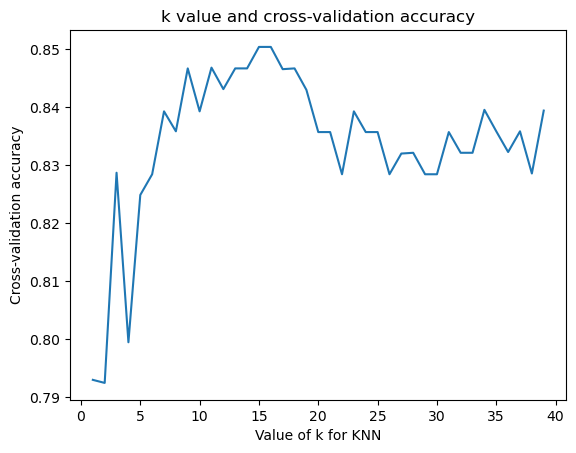

In [7]:
# Scaling the data
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

# Determining the best k-value with k range of (1,40), by cross-validation score.
kscores = []
for k in range(1,40):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cv_scores = cross_val_score(classifier, X = X_train, y = y_train, cv = 10) 
    kscores.append(cv_scores.mean())

# The highest cross-validation accuracy and the corresponding k value/s.
print('Highest cross-validation accuracy', max(kscores))
k_value_with_highest_cv_accuracy = np.where(kscores == np.amax(kscores))
print(k_value_with_highest_cv_accuracy)

plt.plot(range(1, 40), kscores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-validation accuracy')
plt.title('k value and cross-validation accuracy') 
plt.show()

The k (number of neighbours in KNN algorithm) value with the highest cross-validation accuracy is 14 and 15. Both k value 14 and 15 have cross-validation score 0.8503.



Now, we have found the best K value/s with the help of cross-validation. We will use our test data to evaluate our classifier.

In [8]:
# Splitting the dataset into Training set and Test set 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_test, y_test, test_size = 0.7, random_state = 0)

# Feature Scaling 
sc1 = StandardScaler() 
X_train1 = sc1.fit_transform(X_train1) 
X_test1 = sc1.transform(X_test1)

# Applying KNN algorithm
new_classifier1 = KNeighborsClassifier(n_neighbors = 14)
new_classifier1.fit(X_train1, y_train1)
y_prediction1 = new_classifier1.predict(X_test1)

print(confusion_matrix(y_test1, y_prediction1))
print(classification_report(y_test1, y_prediction1))

[[165  25]
 [ 39 222]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       190
           1       0.90      0.85      0.87       261

    accuracy                           0.86       451
   macro avg       0.85      0.86      0.86       451
weighted avg       0.86      0.86      0.86       451



AUC: 0.9168179068360556


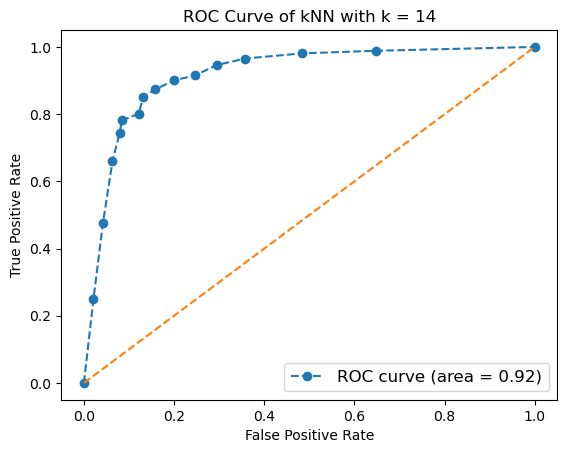

In [9]:
# ROC Curve for K = 14
y_scores1 = new_classifier1.predict_proba(X_test1)
fpr, tpr, threshold = roc_curve(y_test1, y_scores1[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC: {}".format(roc_auc))
plt.plot(fpr, tpr , '--o', label = 'ROC curve (area = %0.2f)'% (roc_auc))
plt.plot([0,1], [0,1],'--')
plt.legend(fontsize=12)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of kNN with k = 14')
plt.show()

In [10]:
# Splitting the dataset into Training set and Test set 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_test, y_test, test_size = 0.7, random_state = 0)

# Feature Scaling 
sc2 = StandardScaler() 
X_train2 = sc2.fit_transform(X_train2) 
X_test2 = sc2.transform(X_test2)

# Applying KNN algorithm
new_classifier2 = KNeighborsClassifier(n_neighbors = 15)
new_classifier2.fit(X_train2, y_train2)
y_prediction2 = new_classifier2.predict(X_test2)

print(confusion_matrix(y_test2, y_prediction2))
print(classification_report(y_test2, y_prediction2))

[[162  28]
 [ 37 224]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       190
           1       0.89      0.86      0.87       261

    accuracy                           0.86       451
   macro avg       0.85      0.86      0.85       451
weighted avg       0.86      0.86      0.86       451



AUC: 0.9145291389393022


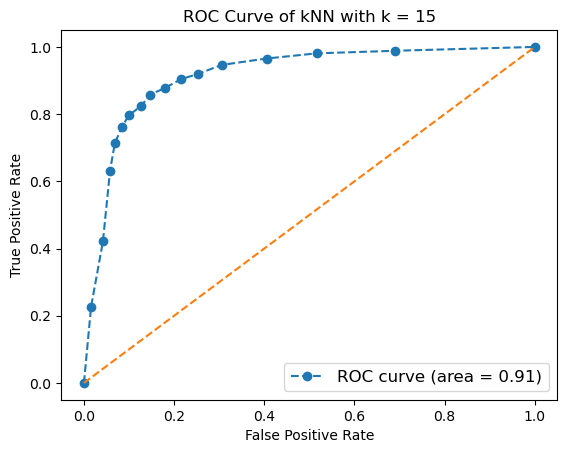

In [11]:
# ROC Curve for K = 15
y_scores2 = new_classifier2.predict_proba(X_test2)
fpr2 , tpr2 , threshold2 = roc_curve(y_test2, y_scores2[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("AUC: {}".format(roc_auc2))
plt.plot(fpr2, tpr2 , '--o', label = 'ROC curve (area = %0.2f)'% (roc_auc2))
plt.plot([0,1], [0,1],'--')
plt.legend(fontsize=12)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of kNN with k = 15')
plt.show()